filtered_stocks = self._ticker_data[(self._ticker_data['ticker'] == 'LYFT')]


[*********************100%***********************]  1 of 1 completed

import yfinance as yf
import pandas as pd

tickers = ['LYFT']
start_date = '2019-03-29'
end_date = '2023-10-30'
_strategy_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    _strategy_data[ticker] = data['Close']
Loading data...


{'long': <function SimpleStrategies.long at 0x124559870>, 'long_short': <function SimpleStrategies.long_short at 0x124559990>, 'short': <function SimpleStrategies.short at 0x124559900>, 'macd_trend_following': <function TechnicalAnalysisStrategies.macd_trend_following at 0x124599f30>, 'mean_reversion_bollinger_bands': <function TechnicalAnalysisStrategies.mean_reversion_bollinger_bands at 0x12459a050>, 'mean_reversion_moving_average': <function TechnicalAnalysisStrategies.mean_reversion_moving_average at 0x124599fc0>, 'momentum_strategy': <function TechnicalAnalysisStrategies.momentum_strategy at 0x124599ea0>, 'pairs_trading': <function TechnicalAnalysisStrategies.pairs_trading at 0x12459a0e0>, 'LSTM': <function MachineLearningStrategies.LSTM at 0x125b1ab00>, '_calculate_technical_indicators': <bound method MachineLearningStrategies._calculate_technical_indicators of <class 'tr4der.strategies.machine_learning_strategies.MachineLearningStrategies'>>, 'decision_tree_regression': <functio

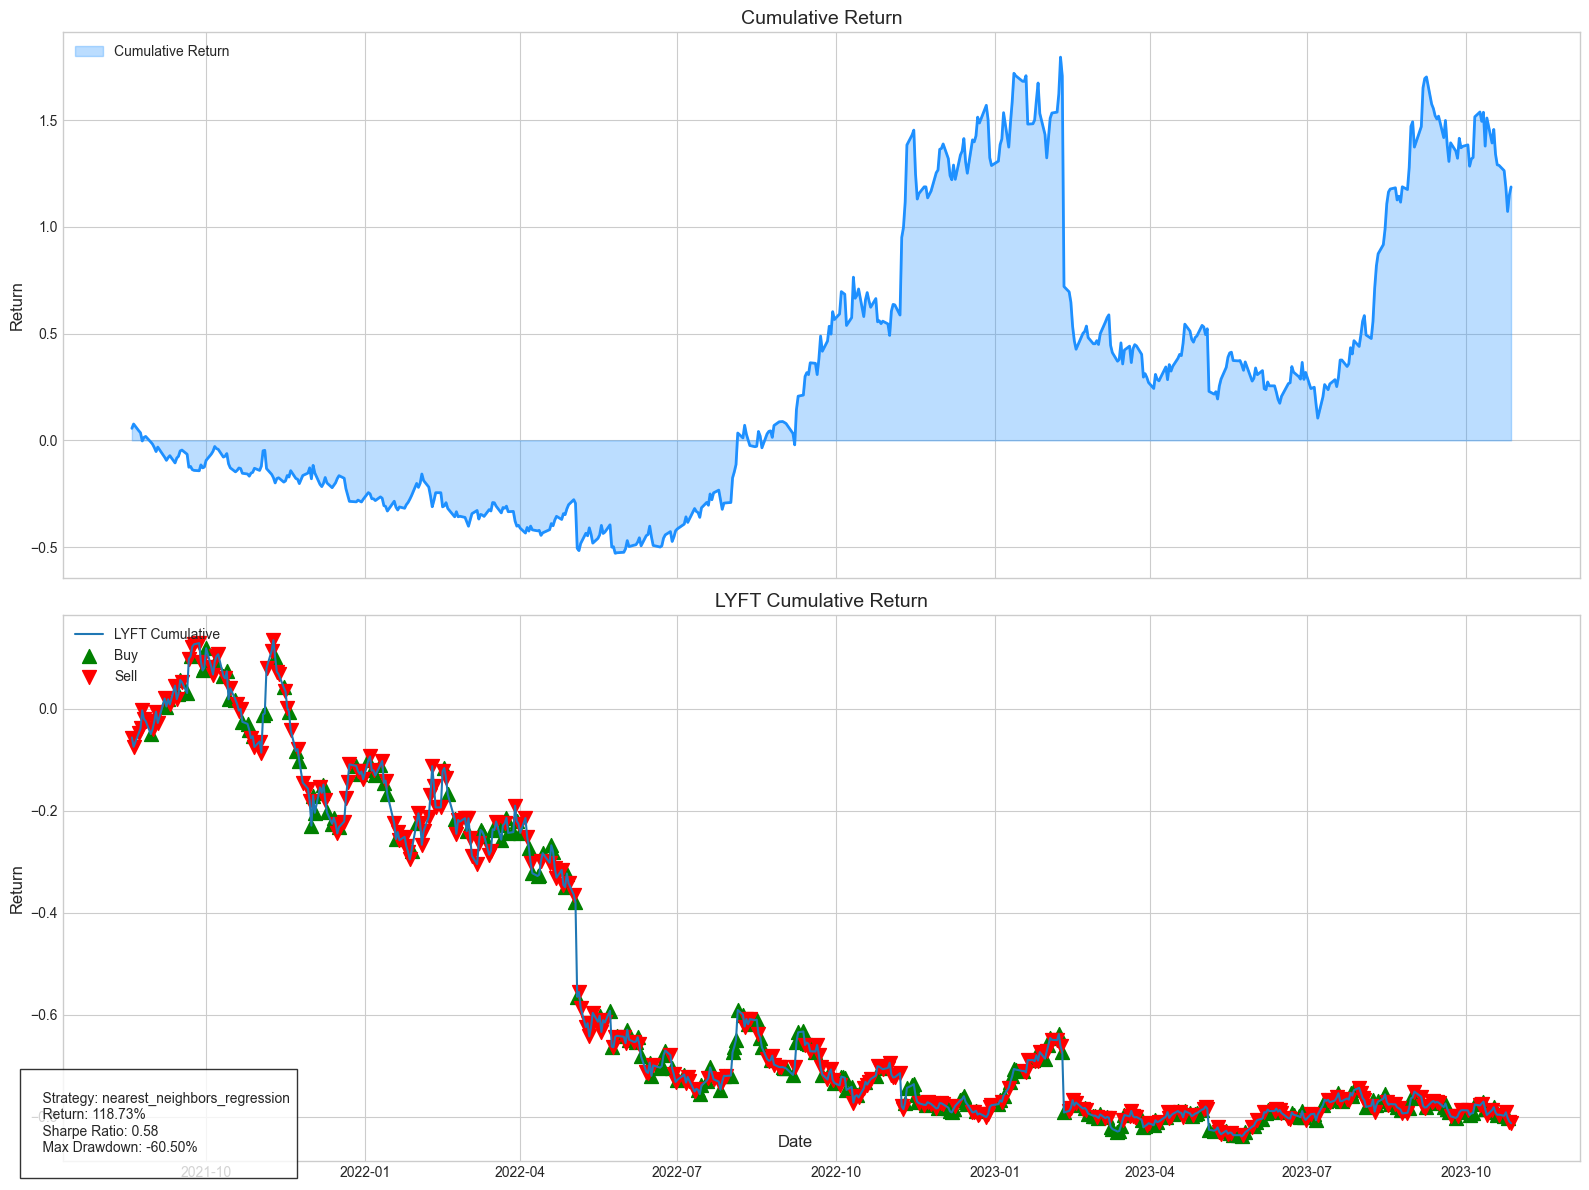

In [7]:
import yfinance as yf
import pandas as pd
from tr4der.tr4der import Tr4der

query = "I want to use a KNN regression model to trade lyft stock since their IPO to now "

inst = Tr4der(query)


In [4]:
df = inst.strategy_data

In [5]:
df

,HOOD,HOOD_return,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14,Previous_Day_Return
Date,,,,,,,,
2021-07-30,35.150002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-02,37.680000,0.071977,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,46.799999,0.242038,NaN,NaN,NaN,NaN,NaN,0.071977
2021-08-04,70.389999,0.504060,NaN,NaN,NaN,NaN,NaN,0.242038
2021-08-05,50.970001,-0.275891,NaN,NaN,NaN,NaN,NaN,0.504060
...,...,...,...,...,...,...,...,...
2023-09-25,9.680000,-0.002062,-0.003142,-0.004882,-0.008121,-0.003810,-0.058693,-0.013225
2023-09-26,9.530000,-0.015496,-0.004046,-0.004816,-0.007588,-0.003748,-0.009630,-0.002062
2023-09-27,9.570000,0.004197,-0.004818,-0.005306,-0.008287,-0.004167,-0.072172,-0.015496


In [ ]:
# import re
# import ta
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPRegressor
# import numpy as np

# ticker = "UBER"
# technical_indicators = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14']

# # Split the data into training and testing sets
# train_data, test_data = train_test_split(df, test_size=0.5, random_state=0, shuffle=False)

# # Separate features and target variable
# print(train_data.columns)
# train_features = train_data[technical_indicators + ['Previous_Day_Return']]
# train_target = train_data[f'{ticker}_return']

# # Create and train the SVR model
# mlp = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=1000, shuffle=False)
# mlp.fit(train_features, train_target)

# # Make predictions on the test set
# test_features = test_data[technical_indicators + ['Previous_Day_Return']]
# test_target = test_data[f'{ticker}_return']
# predictions = mlp.predict(test_features)
# test_data['predictions'] = predictions


# #We actually find a very good negative correlation between this ML model. 
# #Let's add signals for buying/selling
# test_data[f'{ticker}_signal'] = np.where(test_data['predictions'] > 0, 'Buy', 'Sell')

# test_data[f'{ticker}_position'] = np.where(test_data[f'{ticker}_signal'] == 'Buy', 1, -1)
# test_data[f'Total_Return'] = test_data[f'{ticker}_position'] * test_data[f'{ticker}_return']
# test_data[f'Cumulative_Return'] = (1 + test_data[f'Total_Return']).cumprod()
# test_data[f'Drawdown'] = (test_data[f'Cumulative_Return'] / test_data[f'Cumulative_Return'].cummax()) - 1

# from sklearn.metrics import r2_score

# r_squared = r2_score(test_target, predictions)
# print(f"R-squared: {r_squared}")
    

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # ... existing code ...

# # Calculate the error for each prediction
# test_data['error'] = test_data[f'{ticker}_return'] - test_data['predictions']

# # Calculate Mean Squared Error
# mse = mean_squared_error(test_target, predictions)
# print(f"Mean Squared Error: {mse}")

# # Plot the training error over iterations
# plt.figure(figsize=(14, 7))
# plt.plot(mlp.loss_curve_, label='Training Error')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title('Neural Network Training Error Over Iterations')
# plt.legend()
# plt.show()


# # ... existing code ...